In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# With/without keywords

## Without action words

In [2]:
# scores without action words
prediction_noaction = pd.read_csv(f"../data/predictions/predictions_roberta_simplified_synthetic_weights_no_action.csv")

# scores for originl text
prediction_original = pd.read_csv(f"../data/predictions/predictions_roberta_simplified_synthetic_weights.csv")

In [3]:
prediction_original["prediction_noaction"] = ["Participation in\ncollective action" if x == 0 else "None" for x in prediction_noaction["predictions"]]
prediction_original["predictions"] = ["Participation in\ncollective action" if x == 0 else "None" for x in prediction_original["predictions"]]

## Action words substitution

In [5]:
# scores sub action words
prediction_subaction = pd.read_csv(f"../data/predictions/predictions_roberta_simplified_synthetic_weights_sub_action.csv")

In [6]:
prediction_original["prediction_subaction"] = ["Participation in\ncollective action" if x == 0 else "None" for x in prediction_subaction["predictions"]]

## Removing random tokens

In [8]:
# scores remove random tokens
prediction_norandom = pd.read_csv(f"../data/predictions/predictions_roberta_simplified_synthetic_weights_no_random.csv")

In [9]:
prediction_original["prediction_norandom"] = ["Participation in\ncollective action" if x == 0 else "None" for x in prediction_norandom["predictions"]]

## Substituting random tokens

In [11]:
# scores remove random tokens
prediction_subrandom = pd.read_csv(f"../data/predictions/predictions_roberta_simplified_synthetic_weights_sub_random.csv")

In [12]:
prediction_original["prediction_subrandom"] = ["Participation in\ncollective action" if x == 0 else "None" for x in prediction_subrandom["predictions"]]

Create a single plot containing all

/tmp/ipykernel_4035624/2951946099.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


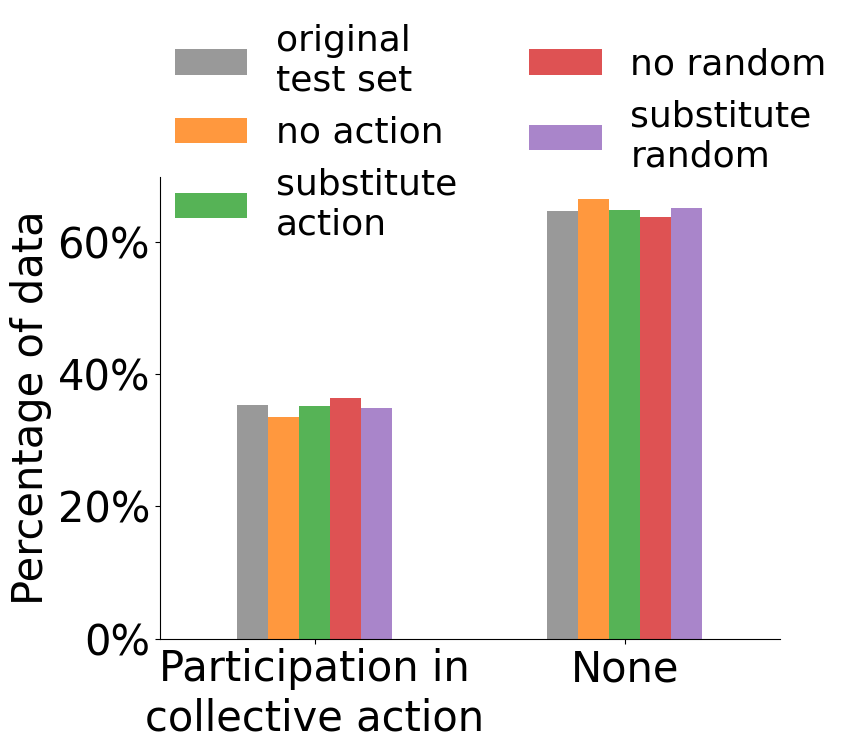

In [14]:
# Create a DataFrame with value counts for both columns
df_combined = pd.DataFrame({
    'original\ntest set': prediction_original["predictions"].value_counts(normalize=True) * 100,
    'no action': prediction_original["prediction_noaction"].value_counts(normalize=True) * 100,
    'substitute\naction': prediction_original["prediction_subaction"].value_counts(normalize=True) * 100,
    'no random': prediction_original["prediction_norandom"].value_counts(normalize=True) * 100,
    'substitute\nrandom': prediction_original["prediction_subrandom"].value_counts(normalize=True) * 100
})

df_combined = df_combined.loc[["Participation in\ncollective action", "None"]]

# Plot the grouped bar chart with percentages
ax = df_combined.plot(kind="bar", color=['grey', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], alpha = 0.8, figsize=(8, 6))

# Add labels and title
ax.set_ylabel("Percentage of data", fontsize=30)

# set ticks size
ax.tick_params(axis='both', which='major', labelsize=30)

# Adjust the legend
plt.legend(
    fontsize=26, 
    loc='upper center', 
    bbox_to_anchor=(0.55, 1.4),  # Move legend outside the plot box
    ncol=2,  # Split legend into 3 columns
    framealpha=0
)
plt.xticks(rotation=0)

# Change y ticks to percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


# remove left and upper border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
